In [1]:
# import library termasuk spacy, gensim, re
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import spacy
import string
import gensim
import operator
import re

In [16]:
from google.colab import files

# Upload berkas
uploaded = files.upload()

Saving berita_feb_unpad.txt to berita_feb_unpad.txt


In [17]:

df_text = pd.read_csv('berita_feb_unpad.txt') # file database saya letakan lokal


In [18]:
#kita intip
df_text.head()

,menristek dorong unpad membangun sdm unggul melalui penciptaan ekosistem inovasi program doktor ilmu manajemen fakultas ekonomi dan bisnis universitas padjadjaran menggelar kuliah perdana virtual bagi mahasiswa baru tahun akademik dengan tema akselerasi penguatan sistem inovasi nasional peluang dan tantangan pasca pandemi jumat prof bambang menteri riset dan teknologi ri atau menristek prof bambang brodjonegoro saat menjadi pembicara kunci dalam acara kuliah perdana program doktor ilmu manajemen fakultas ekonomi dan bisnis universitas padjadjaran secara virtual jumat menteri riset dan teknologi ri atau menristek prof bambang brodjonegoro memaparkan strategi untuk mendorong indonesia keluar dari jurang negara pendapatan menengah menuju negara maju pada 2045 mendatang menurutnya perlu strategi khusus untuk mendukung pertumbuhan indonesia satu di antaranya adalah mengubah orientasi ekonomi yang semula berbasis sumber daya alam menjadi negara dengan perekonomian berbasis inovasi inovasi sendiri harus dikembangkan ekosistem yang mendorong inovasi harus dibentuk dijaga dan disempurnakan ungkap prof bambang saat menjadi pembicara kunci dalam acara kuliah perdana program doktor ilmu manajemen fakultas ekonomi dan bisnis universitas padjadjaran secara virtual jumat meski demikian inovasi di indonesia belum banyak berkembang karena belum adanya kesepahaman antara dunia penelitian dan dunia usaha karena itu penguatan inovasi perlu menekankan pada strategi kolaborasi triple helix atau kolaborasi yang melibatkan tiga unsur pemangku kepentingan yaitu akademisi dunia usaha dan pemerintah kolaborasi ini kata prof bambang akan mendorong terciptanya kesepahaman antara aktivitas penelitian dan kebutuhan di pasar melalui fasilitasi penuh pemerintah tanpa kolaborasi ini dikhawatirkan sangat sedikit produk inovasi yang bisa diterima oleh pasar lebih lanjut prof bambang memaparkan inovasi indonesia perlu mempertimbangkan sejumlah hal pertama inovasi yang dilahirkan merupakan teknologi tepat guna yang mudah dipakai murah serta relevan dengan kondisi setempat selanjutnya inovasi bisa menggantikan peran impor mampu menciptakan nilai tambah dan komersialisasi beragam keankeragaman hayati di indonesia serta mengadopsi teknologi terkini dalam upaya mewujudkan strategi tersebut perguruan tinggi menjadi sektor yang terus didorong untuk menciptakan ekosistem inovasi prof bambang menjelaskan pendidikan menjadi kunci unutk melahirkan sumber daya manusia berkualitas yang akan menjadi penentu keberhasilan penguatan inovasi perguruan tinggi didorong untuk lebih sering lakukan riset dan interaksi dengan dunia luar kata prof bambang kuliah perdana bertajuk akselerasi penguatan sistem inovasi nasional: peluang dan tantangan pasca-pandemi ini dibuka secara resmi oleh rektor unpad prof rina indiastuti acara juga diisi dengan penyampaian materi kuliah oleh guru besar feb unpad yang juga atase pendidikan dan kebudayaan kbri washington dc amerika serikat prof popy rufaidah phd


In [19]:
#Kita preprocessing datanya:
# Membuang stop_words
#Membuang punctuation
#Membuang tanda2
#Membuang kata yang mengandung angka

#Tokenisasi: Memecah2 kata
#Lematisasi: Dibuat kata dasar
from spacy.lang.en.stop_words import STOP_WORDS

spacy_nlp = spacy.load('en_core_web_sm')

#create list of punctuations and stopwords
punctuations = string.punctuation
stop_words = spacy.lang.en.stop_words.STOP_WORDS

#function for data cleaning and processing
#This can be further enhanced by adding / removing reg-exps as desired.

def spacy_tokenizer(sentence):

    #remove distracting single quotes
    sentence = re.sub('\'','',sentence)

    #remove digits adnd words containing digits
    sentence = re.sub('\w*\d\w*','',sentence)

    #replace extra spaces with single space
    sentence = re.sub(' +',' ',sentence)

    #remove unwanted lines starting from special charcters
    sentence = re.sub(r'\n: \'\'.*','',sentence)
    sentence = re.sub(r'\n!.*','',sentence)
    sentence = re.sub(r'^:\'\'.*','',sentence)

    #remove non-breaking new line characters
    sentence = re.sub(r'\n',' ',sentence)

    #remove punctunations
    sentence = re.sub(r'[^\w\s]',' ',sentence)

    #creating token object
    tokens = spacy_nlp(sentence)

    #lower, strip and lemmatize
    tokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens]

    #remove stopwords, and exclude words less than 2 characters
    tokens = [word for word in tokens if word not in stop_words and word not in punctuations and len(word) > 2]

    #return tokens
    return tokens

In [20]:
# Buat DataFrame dengan teks pada kolom 'wiki_plot'
df_text = pd.DataFrame({'text_plot': ["menristek dorong unpad membangun sdm unggul melalui penciptaan ekosistem inovasi program doktor ilmu manajemen fakultas ekonomi dan bisnis universitas padjadjaran menggelar kuliah perdana virtual bagi mahasiswa baru tahun akademik dengan tema akselerasi penguatan sistem inovasi nasional peluang dan tantangan pasca pandemi jumat prof bambang menteri riset dan teknologi ri atau menristek prof bambang brodjonegoro saat menjadi pembicara kunci dalam acara kuliah perdana program doktor ilmu manajemen fakultas ekonomi dan bisnis universitas padjadjaran secara virtual jumat menteri riset dan teknologi ri atau menristek prof bambang brodjonegoro memaparkan strategi untuk mendorong indonesia keluar dari jurang negara pendapatan menengah menuju negara maju pada 2045 mendatang menurutnya perlu strategi khusus untuk mendukung pertumbuhan indonesia satu di antaranya adalah mengubah orientasi ekonomi yang semula berbasis sumber daya alam menjadi negara dengan perekonomian berbasis inovasi inovasi sendiri harus dikembangkan ekosistem yang mendorong inovasi harus dibentuk dijaga dan disempurnakan ungkap prof bambang saat menjadi pembicara kunci dalam acara kuliah perdana program doktor ilmu manajemen fakultas ekonomi dan bisnis universitas padjadjaran secara virtual jumat meski demikian inovasi di indonesia belum banyak berkembang karena belum adanya kesepahaman antara dunia penelitian dan dunia usaha karena itu penguatan inovasi perlu menekankan pada strategi kolaborasi triple helix atau kolaborasi yang melibatkan tiga unsur pemangku kepentingan yaitu akademisi dunia usaha dan pemerintah kolaborasi ini kata prof bambang akan mendorong terciptanya kesepahaman antara aktivitas penelitian dan kebutuhan di pasar melalui fasilitasi penuh pemerintah tanpa kolaborasi ini dikhawatirkan sangat sedikit produk inovasi yang bisa diterima oleh pasar lebih lanjut prof bambang memaparkan inovasi indonesia perlu mempertimbangkan sejumlah hal pertama inovasi yang dilahirkan merupakan teknologi tepat guna yang mudah dipakai murah serta relevan dengan kondisi setempat selanjutnya inovasi bisa menggantikan peran impor mampu menciptakan nilai tambah dan komersialisasi beragam keankeragaman hayati di indonesia serta mengadopsi teknologi terkini dalam upaya mewujudkan strategi tersebut perguruan tinggi menjadi sektor yang terus didorong untuk menciptakan ekosistem inovasi prof bambang menjelaskan pendidikan menjadi kunci unutk melahirkan sumber daya manusia berkualitas yang akan menjadi penentu keberhasilan penguatan inovasi perguruan tinggi didorong untuk lebih sering lakukan riset dan interaksi dengan dunia luar kata prof bambang kuliah perdana bertajuk akselerasi penguatan sistem inovasi nasional: peluang dan tantangan pasca-pandemi ini dibuka secara resmi oleh rektor unpad prof rina indiastuti acara juga diisi dengan penyampaian materi kuliah oleh guru besar feb unpad yang juga atase pendidikan dan kebudayaan kbri washington dc amerika serikat prof popy rufaidah phd"]} )

# Pembersihan, tokenisasi, dan lemmatisasi teks, dan menyimpan hasilnya di kolom baru
print('Pembersihan, Tokenisasi, dan Lemmatisasi...')
df_text['text_plot_tokenized'] = df_text['text_plot'].map(lambda x: spacy_tokenizer(x))

# Menampilkan DataFrame dengan kolom baru
df_text.head()

Pembersihan, Tokenisasi, dan Lemmatisasi...


,text_plot,text_plot_tokenized
0,menristek dorong unpad membangun sdm unggul me...,"[menristek, dorong, unpad, membangun, sdm, ung..."


In [21]:
#kita intip hasil tokenisasinya
text_plot = df_text['text_plot_tokenized']
text_plot[0:5]

0    [menristek, dorong, unpad, membangun, sdm, ung...
Name: text_plot_tokenized, dtype: object

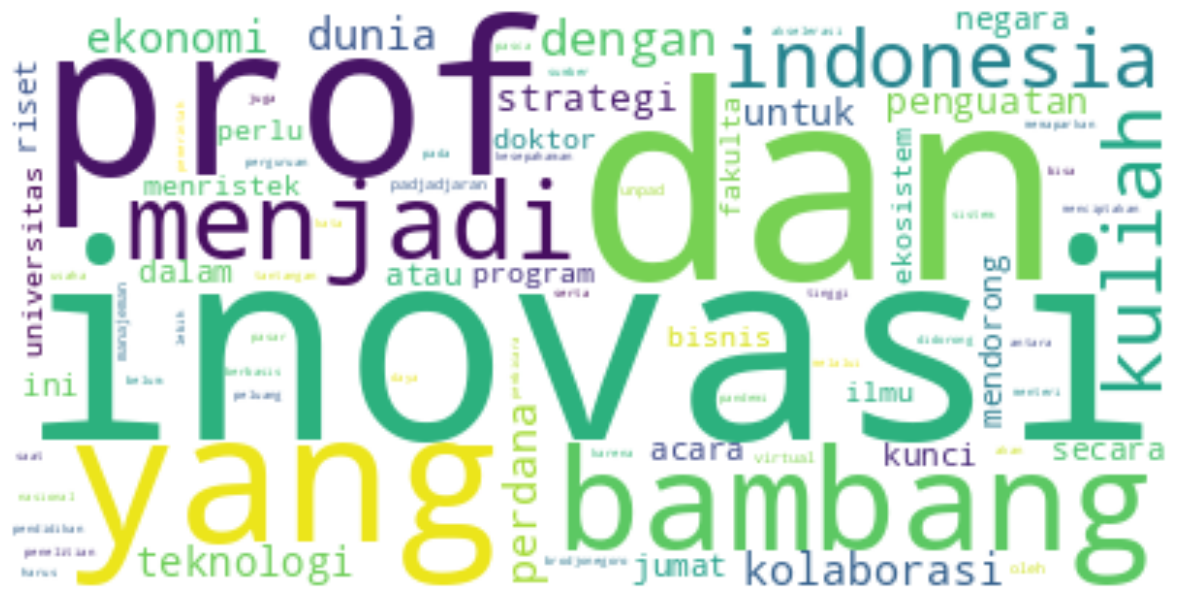

In [22]:
# Membuat wordcloud untuk memunculkan kata-kata yang paling sering muncul
#Makin sering muncul satu kata, makin besar hurufnya
from wordcloud import WordCloud
import matplotlib.pyplot as plt

series = pd.Series(np.concatenate(text_plot)).value_counts()[:100]
wordcloud = WordCloud(background_color='white').generate_from_frequencies(series)

plt.figure(figsize=(15,15), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()